<a href="https://colab.research.google.com/github/divi1287/rnn/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import os
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Flatten,Dense
from keras.optimizers import Adam

In [3]:
import os

# Directory where you want to save the model checkpoint
#checkpoint_dir = '/path/to/checkpoints'
checkpoint_dir = '/content/drive/MyDrive/Colab Notebooks/checkpoints'

# Create the directory if it doesn't exist
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

# Define the file name for the model checkpoint
checkpoint_filename = 'best_model.h5'

# Combine the directory and filename to create the full path
checkpoint_path = os.path.join(checkpoint_dir, checkpoint_filename)

# Now you can use the checkpoint_path to save or load your model checkpoints


In [4]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [5]:
print(X_train.shape)

(60000, 28, 28)


In [6]:
print(y_train.shape)

(60000,)


In [7]:
print(y_test.shape)

(10000,)


In [8]:
print(X_test.shape)

(10000, 28, 28)


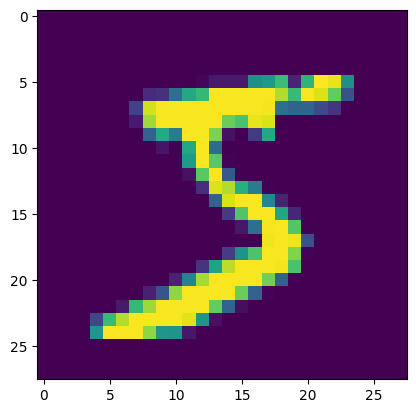

In [9]:
plt.imshow(X_train[0])

In [10]:
#Showing corresponding label for the above
print(y_train[0])

5


In [11]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [12]:
#Scalar Operation
X_train=X_train/255
X_test=X_test/255

In [13]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [14]:
# Simple Neural networks
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [15]:
learning_rate = 0.01 # Adjust the learning rate as needed
optimizer = Adam(learning_rate=learning_rate)


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [18]:
#save_callback=keras.callbacks.ModelCheckpoint('checkpoint/',save_weightsonly=True,monitor='accuracy',save_best_only=False)

In [19]:
model.compile(optimizer="Adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [20]:
from tensorflow.keras.callbacks import LearningRateScheduler
import tensorflow as tf

def scheduler(epoch,lr):
  if epoch<=3:
    return lr
  else:
    return lr*tf.math.exp(-0.1)

In [21]:
lr=0.10
for i in range(10):
  lr=scheduler(i,lr)
  print(i,lr)

0 0.1
1 0.1
2 0.1
3 0.1
4 tf.Tensor(0.09048375, shape=(), dtype=float32)
5 tf.Tensor(0.08187308, shape=(), dtype=float32)
6 tf.Tensor(0.07408183, shape=(), dtype=float32)
7 tf.Tensor(0.06703202, shape=(), dtype=float32)
8 tf.Tensor(0.06065308, shape=(), dtype=float32)
9 tf.Tensor(0.054881178, shape=(), dtype=float32)


In [22]:
callback=LearningRateScheduler(scheduler)


In [23]:
#Define a callback to save the best model
checkpoint_callback = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True)

In [24]:
history=model.fit(X_train,y_train,batch_size=64,epochs=10,verbose=1,validation_split=0.2,callbacks=checkpoint_callback)

Epoch 1/10
750/750 [==============================] - 9s 10ms/step - loss: 0.3267 - accuracy: 0.9082 - val_loss: 0.1869 - val_accuracy: 0.9478
Epoch 2/10
750/750 [==============================] - 6s 8ms/step - loss: 0.1534 - accuracy: 0.9561 - val_loss: 0.1380 - val_accuracy: 0.9603
Epoch 3/10
750/750 [==============================] - 5s 7ms/step - loss: 0.1068 - accuracy: 0.9689 - val_loss: 0.1121 - val_accuracy: 0.9668
Epoch 4/10
750/750 [==============================] - 5s 7ms/step - loss: 0.0820 - accuracy: 0.9759 - val_loss: 0.1092 - val_accuracy: 0.9676
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0647 - accuracy: 0.9813 - val_loss: 0.0960 - val_accuracy: 0.9712
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0508 - accuracy: 0.9851 - val_loss: 0.0908 - val_accuracy: 0.9735
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0414 - accuracy: 0.9884 - val_loss: 0.0913 - val_accuracy: 0.9718
Epoch

In [252]:

# Load the best model
best_model = load_model(checkpoint_path)

In [253]:
best_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [254]:
training_loss = history.history['loss']

# Access validation loss history
validation_loss = history.history['val_loss']

# Access training accuracy history
training_accuracy = history.history['accuracy']

# Access validation accuracy history
validation_accuracy = history.history['val_accuracy']
print(validation_loss)
print(validation_accuracy)
print(training_accuracy)






[0.0892973393201828, 0.09272123128175735, 0.0937686562538147, 0.09723076224327087, 0.09470880031585693, 0.09971011430025101, 0.0974196046590805, 0.100196972489357, 0.0976066067814827, 0.10412456095218658]
[0.9750000238418579, 0.9754999876022339, 0.9748333096504211, 0.9743333458900452, 0.9767500162124634, 0.9750833511352539, 0.9771666526794434, 0.9775000214576721, 0.9775000214576721, 0.9773333072662354]
[0.995229184627533, 0.9963333606719971, 0.9971874952316284, 0.9972291588783264, 0.9981874823570251, 0.9978541731834412, 0.9990416765213013, 0.9980833530426025, 0.9984583258628845, 0.9996458292007446]


In [255]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1037 - accuracy: 0.9759


[0.10370489209890366, 0.9758999943733215]

In [256]:
model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


array([[1.1506202e-08, 1.6422759e-11, 5.1066449e-09, ..., 9.9988621e-01,
        9.2952592e-07, 6.5530648e-06],
       [7.3731736e-15, 1.6947280e-07, 9.9999982e-01, ..., 4.3108863e-22,
        6.6694358e-11, 3.6082460e-23],
       [5.7309241e-10, 9.9999410e-01, 8.0159731e-07, ..., 3.6794566e-07,
        4.3964587e-06, 2.7168992e-10],
       ...,
       [6.9960099e-20, 9.5640364e-16, 6.4731438e-19, ..., 2.0398641e-10,
        2.2228670e-10, 4.0595393e-07],
       [2.8897220e-16, 3.6985704e-20, 1.8906804e-21, ..., 3.1212704e-16,
        7.0461937e-08, 3.0751045e-18],
       [6.7581101e-12, 1.2565981e-16, 6.5478449e-13, ..., 1.2396229e-19,
        1.4740487e-13, 5.5976346e-21]], dtype=float32)

In [257]:
predicted_classes = model.predict(X_test)
predicted_classes = np.argmax(predicted_classes, axis=1)


313/313 [==============================] - 1s 2ms/step


In [258]:
print(predicted_classes)

[7 2 1 ... 4 5 6]


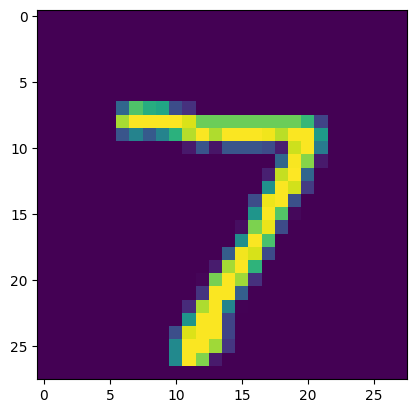

In [259]:
plt.imshow(X_test[0])

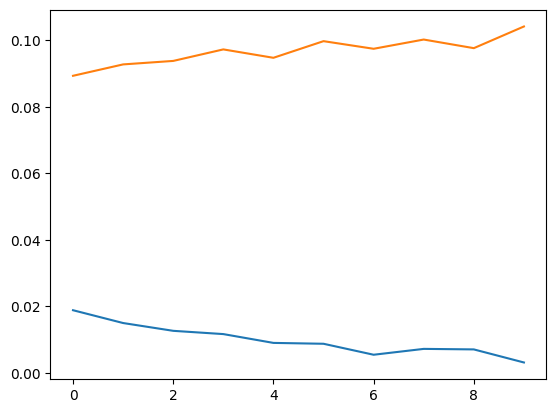

In [260]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

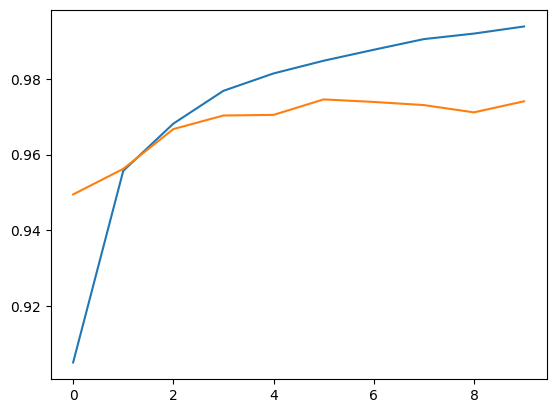

In [247]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [27]:
from google.colab import files

# Upload the model checkpoint file
uploaded = files.upload()

Saving best_model.h5 to best_model.h5


In [29]:
from tensorflow.keras.models import load_model

# Load the model checkpoint
loaded_model = load_model('best_model.h5')  # Replace with the actual filename


In [30]:
# Example: Making predictions using the loaded model
#predictions = loaded_model.predict(some_input_data)


NameError: ignored